<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Naive Bayes Classifier

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Naive Bayes Classifier**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Linear Regression](https://youtu.be/0fzbyhWiP84)
* [Ridge Regression](https://youtu.be/pMGO40yXZ5Y?si=ygJAheyX-v2BmSiR)
* [Bayesian Probability](https://www.youtube.com/watch?v=Ppwfr8H177M&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=6)
* [Bayesian Linear Regression](https://youtu.be/LzZ5b3wdZQk?si=DkhYrgmDXzrPFQyr)
* [Naive Bayes Classifier](https://youtu.be/BDvyLrH3cLI?si=D6boOpoVpyo-6TqK)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Bayesian Linear Regression

Bayesian machine learning methods apply probability to make predictions with an intrinsic uncertainty model. In addition, the Bayesian methods integrate the concept of Bayesian updating, a prior model updated with a likelihood model from data to calculate a posterior model. 

There are additional complexities with model training due to working with these probabilities, represented by continuous probability density functions. Due to the resulting high complexity, we have to make an assumption of conditional independence resulting a practical classification model.

Here's a simple workflow, demonstration of naive Bayes classification for subsurface modeling workflows. This should help you get started with building subsurface models that with predictions based on multiple sources of information.

This method is great as it builds directly on our knowledge Bayesian statistics to provide a simple, but flexible classification method.

#### Bayesian Updating

The Bayesian approach for probabilities is based on a degree of belief (expert experience) in an event updated as new information is available

* this approach to probability is powerful and can be applied to solve problems that we cannot be solved with the frequentist approach to probability

Bayesian updating is represented by Bayes' Theorem,

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

where $P(A)$ is the prior, $P(B|A)$ is the likelihood, $P(B)$ is the evidence term that is responsible for probability closure, and $P(A|B)$ is the posterior.

#### Bayesian Updating for Classification

The naive Bayes classifier is based on the conditional probability of a category, $k$, given $n$ features, $x_1, \dots , x_n$.  

$$
p(C_k | x_1, \dots , x_n)
$$

we can solve for this posterior with Bayesian updating,

$$
p(C_k | x_1, \dots , x_n) = \frac{p(x_1, \dots , x_n | C_k) p(C_k)}{p(x_1, \dots , x_n)}
$$

let's combine the likelihood and prior for the moment,

$$
p(x_1, \dots , x_n | C_k) p(C_k) = p(x_1, \dots , x_n, C_k)
$$

we can expand the full joint distribution recursively as follows,

$$
p(x_1, \dots , x_n, C_k)
$$

expansion of the joint with the conditional and prior,

$$
p(x_1 | x_2, \dots , x_n, C_k) p(x_2, \dots , x_n, C_k)
$$

continue recursively expanding,

$$
p(x_1 | x_2, \dots , x_n, C_k) p(x_2 | x_3, \dots , x_n, C_k) p(x_3, \dots , x_n, C_k)
$$

we can generalize as,

$$
p(x_1 | x_2, \dots , x_n, C_k) p(x_2 | x_3, \dots , x_n, C_k) p(x_3 | x_4, \dots , x_n, C_k) \ldots (x_{n-1} | x_n, C_k)  (x_{n} | C_k) p(C_k)
$$

#### Naive Bayes Approach

The likelihood, conditional probability with the joint conditional is difficult, likely impossible, to calculate. It requires information about the joint relationship between $x_1, \dots , x_n$ features. As $n$ increases this requires a lot of data to inform the joint distribution.

With the naive Bayes approach we make the 'naive' assumption that the features are all **conditionally independent**. This entails,

$$
p(x_i | x_{i+1}, \ldots , x_n, C_k) = p(x_i | C_k)
$$

for all $i = 1, \ldots, n$ features.

We can now solve for the needed conditional probability as:

$$
p(C_k | x_1, \dots , x_n) = \frac{p(C_k) \prod_{i=1}^{n} p(x_i | C_k)}{p(x_1, \dots , x_n)}
$$

We only need the prior, $p(C_k)$, and a set of conditionals, $p(x_i | C_k)$, for all predictor features, $i = 1,\ldots,n$ and all categories, $k = 1,\ldots,K$.

The evidence term, $p(x_1, \dots , x_n)$, is only based on the features $x_1, \dots , x_n$; therefore, is a constant over the categories $k = 1,\ldots,n$. 

* it ensures closure - probabilities over all categories sum to one 

* we simply standardize the numerators to sum to one over the categories.  

The naive Bayes approach is:

* simple to understand, builds on fundamental Bayesian statistics

* practical even with small datasets since with the conditional independence we only need to estimate simple conditional distributions

#### Load the Required Libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
%matplotlib inline                                         
suppress_warnings = True
import os                                                     # to set current working directory 
import math                                                   # square root operator
import numpy as np                                            # arrays and matrix math
import scipy.stats as stats                                   # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,FuncFormatter,NullLocator) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import seaborn as sns                                         # matrix scatter plots
from sklearn.model_selection import train_test_split          # train and test split
from sklearn.naive_bayes import GaussianNB                    # naive Bayes model and prediction
from sklearn import metrics                                   # measures to check our models
from sklearn.metrics import classification_report             # classification report
from sklearn.metrics import confusion_matrix                  # confusion matrix
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
binary_cmap = ListedColormap(['grey', 'gold'])                # custom binary categorical colormap
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # supress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 13                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [2]:
def comma_format(x, pos):
    return f'{int(x):,}'

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def feature_rank_plot(pred,metric,mmin,mmax,nominal,title,ylabel,mask): # feature ranking plot
    mpred = len(pred); mask_low = nominal-mask*(nominal-mmin); mask_high = nominal+mask*(mmax-nominal); m = len(pred) + 1
    plt.plot(pred,metric,color='black',zorder=20)
    plt.scatter(pred,metric,marker='o',s=10,color='black',zorder=100)
    plt.plot([-0.5,m-1.5],[0.0,0.0],'r--',linewidth = 1.0,zorder=1)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric < nominal),interpolate=True,color='dodgerblue',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric > nominal),interpolate=True,color='lightcoral',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_low),metric,where=(metric < mask_low),
                     interpolate=True,color='blue',alpha=0.8,zorder=10)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_high),metric,where=(metric > mask_high),
                     interpolate=True,color='red',alpha=0.8,zorder=10)  
    plt.xlabel('Predictor Features'); plt.ylabel(ylabel); plt.title(title)
    plt.ylim(mmin,mmax); plt.xlim([-0.5,m-1.5]); add_grid();
    return

def plot_corr(corr_matrix,title,limits,mask):                 # plots a graphical correlation matrix 
    my_colormap = plt.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white                # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns); ax = plt.gca()
    ax.xaxis.set_label_position('bottom'); ax.xaxis.tick_bottom()
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])
    
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,cat,label,cmap): 
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), # set up the mesh
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])          # predict with our trained model over the mesh
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels = 50) # plot the predictions
    for i in range(len(cat)):
        im = plt.scatter(xfeature[response==cat[i]],yfeature[response==cat[i]],s=None,c=response[response==cat[i]], 
                    marker=None, cmap=cmap, norm=None,vmin=z_min,vmax=z_max,alpha=0.8,linewidths=0.3, edgecolors="black",label=label[i])

    plt.title(title)                                          # add the labels
    plt.xlabel(xfeature.name); plt.ylabel(yfeature.name)
    plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max]); add_grid()

def visualize_model_prob(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,title,):# plots the data points and the prediction probabilities 
    n_classes = 10
    cmap = plt.cm.inferno
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), # set up the mesh
                     np.arange(y_min, y_max, yplot_step))
    
    z_min = 0.0; z_max = 1.0
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z1 = Z[:,0].reshape(xx.shape); Z2 = Z[:,1].reshape(xx.shape)
    
    plt.subplot(121)
    cs1 = plt.contourf(xx, yy, Z1, cmap=plt.cm.YlOrBr,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))
    im = plt.scatter(xfeature,yfeature,s=None,c=response,marker=None,cmap=plt.cm.Greys,norm=None,vmin=z_min,vmax=z_max,
                     alpha=0.8, linewidths=0.3, edgecolors="black")
    plt.title(title + ' Probability of Low Production')
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(cs1, orientation = 'vertical')
    cbar.set_label('Probability', rotation=270, labelpad=20)
    
    plt.subplot(122)
    cs2 = plt.contourf(xx, yy, Z2, cmap=plt.cm.YlOrBr,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))
    im = plt.scatter(xfeature,yfeature,s=None,c=response,marker=None,cmap=plt.cm.Greys,norm=None,vmin=z_min,vmax=z_max,
                     alpha=0.8,linewidths=0.3, edgecolors="black")
    plt.title(title + ' Probability of High Production')
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(cs2, orientation = 'vertical')
    cbar.set_label('Probability', rotation=270, labelpad=20)

def display_sidebyside(*args):                                # display DataFrames side-by-side (ChatGPT 4.0 generated Spet, 2024)
    html_str = ''
    for df in args:
        html_str += df.head().to_html()  # Using .head() for the first few rows
    display(HTML(f'<div style="display: flex;">{html_str}</div>'))

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

In [3]:
#os.chdir(r"C:\Users\pm27995\Downloads")                      # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Data

Let's load the provided multivariate, spatial dataset [unconv_MV_v4.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv) available in my GeoDataSet repo. It is a comma delimited file with: 

* well index (integer)
* porosity (%)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^6$).
* brittleness (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial gas production (90 day average) (MCFPD)

In [5]:
add_error = True                                              # add random error to the response feature
std_error = 500                                               # standard deviation of random error, for demonstration only
idata = 1

if idata == 1:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv") # load the data from my github repo
    df_load = df_load.sample(frac=.30, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    df_load = df_load.rename(columns={"Prod": "Production"})   
elif idata == 2:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv") # load the data 
    df_load = df_load.sample(frac=.70, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    df_load = df_load.rename(columns={"Prod": "Production"})
    
yname = 'Production'; Xname = ['Por','Brittle']               # specify the predictor features (x2) and response feature (x1)
Xmin = [5.0,0.0]; Xmax = [25.0,100.0]                         # set minimums and maximums for visualization 
ymin = 1000.0; ymax = 9000.0
Xlabel = ['Porosity','Brittleness']; ylabel = 'Production'    # specify the feature labels for plotting
Xunit = ['%','%']; yunit = 'MCFPD'
Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
ylabelunit = ylabel + ' (' + yunit + ')'
ycname = 'c' + yname

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df_load[yname] = df_load[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df_load)) # add noise
    values = df_load._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray
    
y = pd.DataFrame(df_load[yname])                              # extract selected features as X and y DataFrames
X = df_load[Xname]
df = pd.concat([X,y],axis=1)                                  # make one DataFrame with both X and y (remove all other features)

Let's make sure that we have selected reasonable features to build a model
* the 2 predictor features are not collinear, as this would result in an unstable prediction model
* each of the features are related to the response feature, the predictor features inform the response 

#### Calculate the Correlation Matrix and Correlation with Response Ranking 

Let's start with correlation analysis. We can calculate it and view it in the console with these commands.
* correlation analysis is based on the assumption of linear relationships, but it is a good start

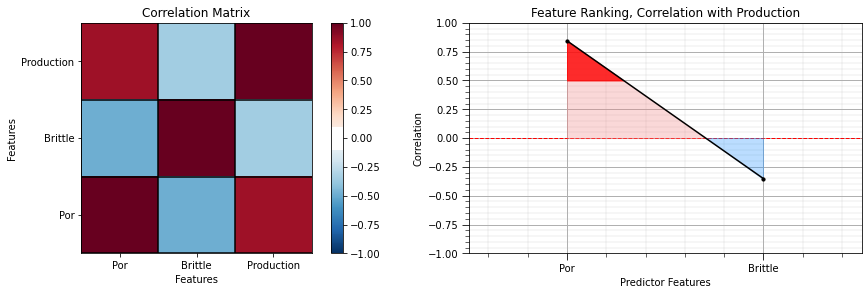

In [6]:
corr_matrix = df.corr()
correlation = corr_matrix.iloc[:,-1].values[:-1]

plt.subplot(121)
plot_corr(corr_matrix,'Correlation Matrix',1.0,0.1)           # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features')

plt.subplot(122)
feature_rank_plot(Xname,correlation,-1.0,1.0,0.0,'Feature Ranking, Correlation with ' + yname,'Correlation',0.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coefficients are limited to degree of linear correlations.  

* Let's look at the matrix scatter plot to see the pairwise relationship between the features.

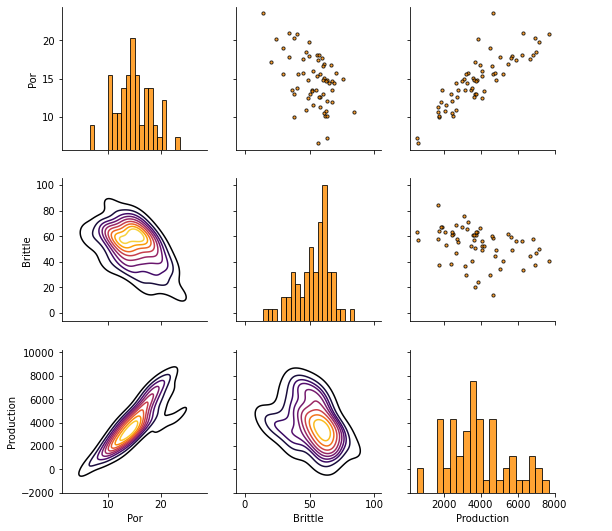

In [7]:
pairgrid = sns.PairGrid(df,vars=Xname+[yname]) # matrix scatter plots
pairgrid = pairgrid.map_upper(plt.scatter, color = 'darkorange', edgecolor = 'black', alpha = 0.8, s = 10)
pairgrid = pairgrid.map_diag(plt.hist, bins = 20, color = 'darkorange',alpha = 0.8, edgecolor = 'k')# Map a density plot to the lower triangle
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap = plt.cm.inferno, 
                              alpha = 1.0, n_levels = 10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2); plt.show()

#### Production Truncation to Categorical Feature

Let's also make a categorical variable for production, based on a threshold of 4,000 MCFPD.

* high production > 4,000 MCFPD, cprod = 1
* low production <= 4,000 MCFPD, cprod = 0

In [8]:
prod_trunc = 4200                                             # criteria for low and high production truncation
y['cProduction'] = np.where(y['Production']>=prod_trunc, 1, 0) # conditional statement assign a new feature

Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [9]:
y.head(n=5)                                                   # preview the first n rows of the DataFrame

,Production,cProduction
0,535.257367,0
1,3664.266856,0
2,1759.441362,0
3,6219.824427,1
4,5455.075177,1


#### Train and Test Split

For convenience and simplicity we use scikit-learn's random train and test split.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=73073) # train and test split
df_train = pd.concat([X_train,y_train],axis=1)                # make one train DataFrame with both X and y (remove all other features)
df_test = pd.concat([X_test,y_test],axis=1)                   # make one testin DataFrame with both X and y (remove all other features)

#### Visualize the DataFrames

Visualizing the train and test DataFrame is useful check before we build our models.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

In [11]:
print('           Training DataFrame                      Testing DataFrame')
display_sidebyside(df_train,df_test)                          # custom function for side-by-side DataFrame display

           Training DataFrame                      Testing DataFrame


,Por,Brittle,Production,cProduction
21,17.21,20.12,3682.419578,0
17,18.04,57.53,6847.702464,1
22,18.48,46.89,7004.402103,1
29,13.53,67.51,1906.299667,0
7,14.95,75.73,3065.623539,0
,Por,Brittle,Production,cProduction
24,18.96,29.28,4483.578476,1
3,18.10,56.09,6219.824427,1
28,13.37,52.23,4181.840761,0
13,13.58,52.16,3461.628938,0


It is good that we checked the summary statistics.

* there are no obvious issues
* check out the range of values for each feature to set up and adjust plotting limits. See above.

#### Visualize the Train and Test Splits

Let's check the consistency and coverage of training and testing with histograms and scatter plots.

* check to make sure the train and test datasets cover the range of possible predictor feature combinations
* ensure we are not extrapolating beyond the training data with the testing cases

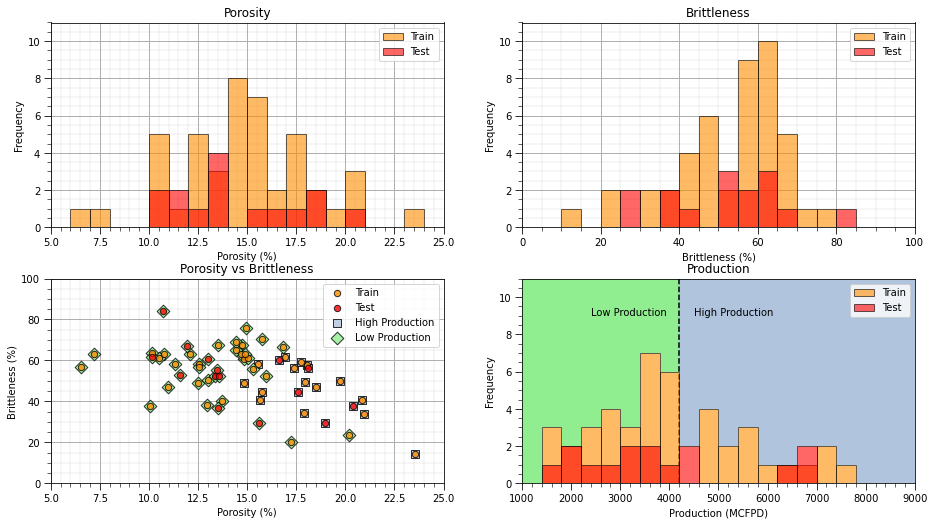

In [12]:
nbins = 21                                                    # number of histogram bins

plt.subplot(221)                                              # predictor feature #1 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[0]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(Xlabel[0]); add_grid()  
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([0,11]); plt.legend(loc='upper right')   

plt.subplot(222)                                              # predictor feature #2 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[1]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(Xlabel[1]); add_grid()  
plt.xlim([Xmin[1],Xmax[1]]); plt.ylim([0,11]); plt.legend(loc='upper right')   

plt.subplot(223)                                              # predictor features #1 and #2 scatter plot
plt.scatter(df_train[Xname[0]],df_train[Xname[1]],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[Xname[0]],df_test[Xname[1]],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.scatter(df_train[df_train[yname]>prod_trunc][Xname[0]],df_train[df_train[yname]>prod_trunc][Xname[1]],s=80,
            marker='s',color = 'lightsteelblue',alpha = 0.8,edgecolor = 'black',zorder=1,label='High Production')
plt.scatter(df_train[df_train[yname]<prod_trunc][Xname[0]],df_train[df_train[yname]<prod_trunc][Xname[1]],s=80,
            marker='D',color = 'lightgreen',alpha = 0.8,edgecolor = 'black',zorder=1,label='Low Production')
plt.scatter(df_test[df_test[yname]>prod_trunc][Xname[0]],df_test[df_test[yname]>prod_trunc][Xname[1]],s=80,
            marker='s',color = 'lightsteelblue',alpha = 0.8,edgecolor = 'black',zorder=1)
plt.scatter(df_test[df_test[yname]<prod_trunc][Xname[0]],df_test[df_test[yname]<prod_trunc][Xname[1]],s=80,
            marker='D',color = 'lightgreen',alpha = 0.8,edgecolor = 'black',zorder=1)

plt.title(Xlabel[0] + ' vs ' +  Xlabel[1])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.legend(); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplot(224)                                              # predictor feature #2 histogram
_,_,_ = plt.hist(x=df_train[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 1.0,
                     edgecolor='white',color='white',density=False,zorder=2)
freq1,_,_ = plt.hist(x=df_train[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train',zorder=10)
_,_,_ = plt.hist(x=df_test[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 1.0,
                     edgecolor='white',color='white',density=False,zorder=2)
freq2,_,_ = plt.hist(x=df_test[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test',zorder=10)
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.vlines(prod_trunc,0,100,color='black',ls='--')
plt.xlabel(ylabelunit); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); add_grid(); plt.title(ylabel)
plt.xlim([ymin,ymax]); plt.ylim([0,11]); plt.legend(loc='upper right')  
plt.fill_between([ymin,prod_trunc],[0,0],[100,100],color='lightgreen',zorder=1)
plt.fill_between([prod_trunc,ymax],[0,0],[100,100],color='lightsteelblue',zorder=1)
plt.annotate('Low Production',[2400,9],color='black',zorder=100); plt.annotate('High Production',[4500,9],color='black',zorder=100)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.6, wspace=0.2, hspace=0.25)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

This looks good,

* the distributions are well behaved, we cannot observe obvious gaps, outliers nor truncations
* the test and train cases have similar coverage

#### Visualize the Predictor Feature Space

Let's build a simplified plot to visualize the 2D predictor feature space with the train and test data.

* we ask the question, will we be able to model the classification boundary? Is there a lot of data overlap? Is the boundary simple (i.e., linear) or more complicated?

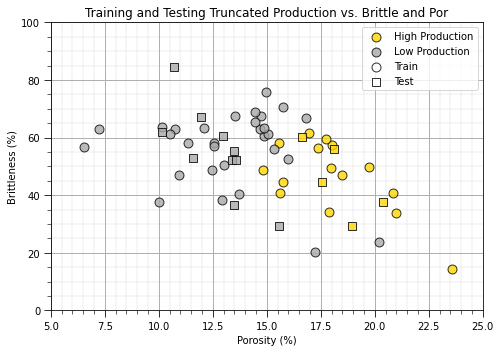

In [13]:
plt.subplot(111)
plt.scatter(df_train[df_train[yname]>prod_trunc][Xname[0]],df_train[df_train[yname]>prod_trunc][Xname[1]],s=80,
            marker='o',color = 'gold',alpha = 0.8,edgecolor = 'black',zorder=1,label='High Production')
plt.scatter(df_train[df_train[yname]<prod_trunc][Xname[0]],df_train[df_train[yname]<prod_trunc][Xname[1]],s=80,
            marker='o',color = 'darkgrey',alpha = 0.8,edgecolor = 'black',zorder=1,label='Low Production')

plt.scatter(df_test[df_test[yname]>prod_trunc][Xname[0]],df_test[df_test[yname]>prod_trunc][Xname[1]],s=80,
            marker='s',color = 'gold',alpha = 0.8,edgecolor = 'black',zorder=1,)
plt.scatter(df_test[df_test[yname]<prod_trunc][Xname[0]],df_test[df_test[yname]<prod_trunc][Xname[1]],s=80,
            marker='s',color = 'darkgrey',alpha = 0.8,edgecolor = 'black',zorder=1,)

plt.scatter([-999],[-999],s=80,marker='o',color = 'white',alpha = 0.8,edgecolor = 'black',zorder=1,label='Train')
plt.scatter([-999],[-999],s=80,marker='s',color = 'white',alpha = 0.8,edgecolor = 'black',zorder=1,label='Test')

plt.legend(loc = 'upper right')
plt.title('Training and Testing Truncated ' + yname + ' vs. ' + Xname[1] + ' and ' + Xname[0])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Instantiate, Fit and Predict with Naive Bayes

We use the naive Bayes classifier to calculate the classification, conditional probability of each of our response feature categories 

$$
P(C_1|x_1,x_2) \propto P(x_1 | C_1) \cdot P(x_2 | C_1) \cdot P(C_1)
$$

$$
P(C_2|x_1,x_2) \propto P(x_1 | C_2) \cdot P(x_2 | C_2) \cdot P(C_2)
$$

where,

* $x_1$ is the first predictor feature (porosity) and $x_2$ is the second predictor feature (brittleness) value
* response feature category $C_1$ is low production and $C_2$ is high production
* $P(x_1 | C_1) \cdot P(x_2 | C_1)$ is an approximation of the likelihood term $P(x_1,x_2 | C_1)$ under the assumption of conditional independence
* $P(C_1)$ and $P(C_2)$ are the prior probabilities of each category, low and high production, prior to integrating the new data
* due to probability closure $P(C_1|x_1,x_2) + P(C_2|x_1,x_2) = 1.0$

#### Gaussian Naive Bayes

We select the Gaussian model as it simplifies the inference problem to a small number of parameters, the conditional means and variances given each feature.

|             |         $X_1$                     ||   $X_2$                              ||
| ----------- | -----------      | ------          | ------            | ------            |
|             | $C_1$            | $C_2$           | $C_1$             | $C_2$             |
| Mean        | $\overline{X}_{1 | C_1}$ | $\overline{X}_{1 | C_2}$ | $\overline{X}_{2 | C_1}$ | $\overline{X}_{2 | C_2}$ |
| St. Dev.    | $\sigma_{X_{1 | C_1}}$ | $\sigma_{X_{1 | C_2}}$ | $\sigma_{X_{2 | C_1}}$ | $\sigma_{X_{2 | C_2}}$ |

Recall we can set a prior probability of each response category

* We should not use proportions from the dataset! This would be information leakage as we are using the same data to inform the prior as the likelihood

* Another option would be to assume a naive, uniform prior, substitute the following:

```python
priors = (0.5,0.5)   # naive prior
```

Note the prior is in a tuple ordered in the same order as the features in the predictor feature DataFrame.

In [45]:
priors = (0.3,0.7)                                            # set the prior probabilities of low and high production

Let's build our Gaussian naive Bayes model.

* instantiate it with the priors 

* train with the training data, we use the standard fit function 

In [46]:
gnb = GaussianNB(priors = priors)                             # instantiate the Gaussian naive Bayes model
GaussianNB_fit = gnb.fit(X_train,y_train[ycname])             # train with the training data

Let's predict with our new model over the testing dataset.

* test by predicting with the testing data, we use the standard prediction function 

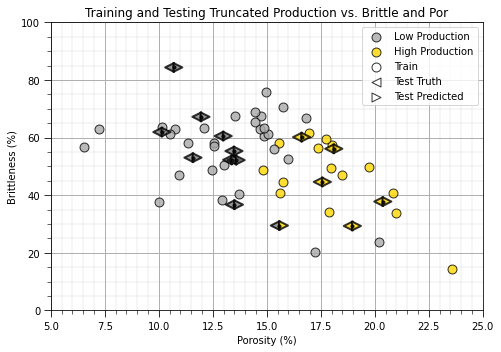

In [47]:
y_pred = GaussianNB_fit.predict(np.c_[X_test['Por'],X_test['Brittle']]) # predict over the testing data

plt.subplot(111)
high = plt.scatter(df_train[df_train[yname]>prod_trunc][Xname[0]],df_train[df_train[yname]>prod_trunc][Xname[1]],s=80,
            marker='o',color = 'gold',alpha = 0.8,edgecolor = 'black',zorder=1,label='High Production')
low = plt.scatter(df_train[df_train[yname]<prod_trunc][Xname[0]],df_train[df_train[yname]<prod_trunc][Xname[1]],s=80,
            marker='o',color = 'darkgrey',alpha = 0.8,edgecolor = 'black',zorder=1,label='Low Production')

plt.scatter(df_test[y_pred == 0][Xname[0]]-0.19,df_test[y_pred == 0][Xname[1]],s=80,lw=2,
             marker='<',c = df_test[y_pred == 0][ycname].values,alpha = 0.8,edgecolor = 'black',zorder=1,cmap=binary_cmap)
plt.scatter(df_test[y_pred == 1][Xname[0]]-0.19,df_test[y_pred == 1][Xname[1]],s=80,lw=2,
             marker='<',c = df_test[y_pred == 1][ycname].values,alpha = 0.8,edgecolor = 'black',zorder=1,cmap=binary_cmap)

plt.scatter(df_test[y_pred == 0][Xname[0]]+0.19,df_test[y_pred == 0][Xname[1]],s=80,lw=2,
             marker='>',c = y_pred[y_pred == 0],alpha = 0.8,edgecolor = 'black',zorder=1,cmap=binary_cmap,vmin=0,vmax=1)
plt.scatter(df_test[y_pred == 1][Xname[0]]+0.19,df_test[y_pred == 1][Xname[1]],s=80,lw=2,
             marker='>',c = y_pred[y_pred == 1],alpha = 0.8,edgecolor = 'black',zorder=1,cmap=binary_cmap,vmin=0,vmax=1)

plt.scatter(df_test[Xname[0]],df_test[Xname[1]],s=10,marker='o',c = 'black',alpha = 0.8,edgecolor = 'black',zorder=100)

train = plt.scatter([-999],[-999],s=80,marker='o',color = 'white',alpha = 0.8,edgecolor = 'black',zorder=1,label='Train') # for legend
truth = plt.scatter([-999],[-999],s=80,marker='<',color = 'white',alpha = 0.8,edgecolor = 'black',zorder=1,label='Truth')
predicted = plt.scatter([-999],[-999],s=80,marker='>',color = 'white',alpha = 0.8,edgecolor = 'black',zorder=1,label='Predicted')

plt.legend([low,high,train,truth,predicted],['Low Production','High Production','Train','Test Truth','Test Predicted'],loc = 'upper right')
plt.title('Training and Testing Truncated ' + yname + ' vs. ' + Xname[1] + ' and ' + Xname[0])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Model Checking

Let's check our model. With scikit learn we have great built in tools to evaluate our classification model. Let's try the classification report first.

```python
classification_report(truth, predicted)                # build a classification report to check our classification model
```

We get a table with summary metrics for model performance. The metrics include, precision, recall and f1-score,
    
    * recall - the ratio of true positives divided by all cases of the category in the testing dataset
    
    * precision - the ratio of true positives divided by all positives (true positives + false positives)
    
    * f1-score - the harmonic mean of recall and precision
    
    * support - the number of samples of each category in the testing data

$$
Precision_k = \frac{ n_{k,\text{true  positives}} }{ n_{k,\text{true  positives}} + n_{k,\text{false  positives}}} = \frac{ n_{k,\text{true  positives}} }{ n_{k, \text{all  positives}} }
$$

$$
Recall_k = \frac{ n_{k, \text{true  positives}} }{n_k}
$$

$$
f1-score_k = \frac{2} { \frac{1}{Precision_k} + \frac{1}{Recall_k} }
$$

It is also useful to look at the confusion matrix, the frequencies of for the combinatorial of true and predicted labels.  

* $\hat{y}_{\alpha}$ - x axis is the prediction - category 0 or 1
* $y_{\alpha}$ - y axis is the truth - category 0 or 1

Let's make a plot to conveniently visualize the classification report and confusion matrix.

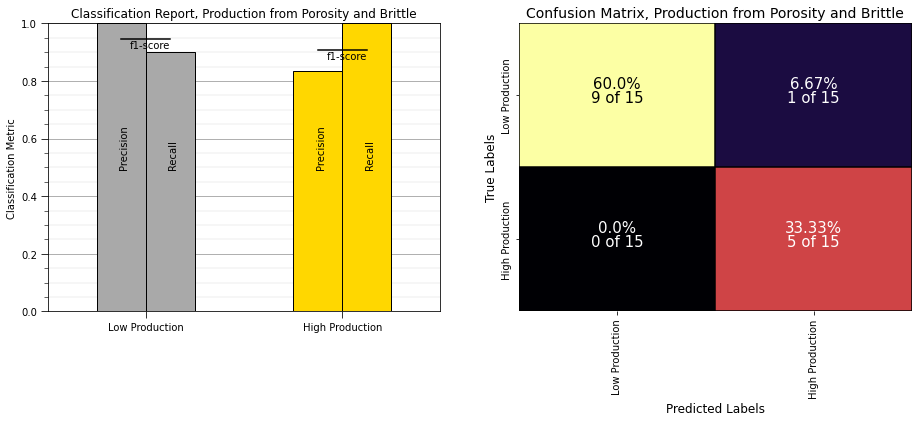

In [48]:
report = classification_report(y_test[ycname].values, y_pred, labels=[0,1],output_dict=True)
precision = [report['0']['precision'],report['1']['precision']]
recall = [report['0']['recall'],report['1']['recall']]
f1score = [report['0']['f1-score'],report['1']['f1-score']]

plt.subplot(121)                                              # plot classification report
plt.bar([-0.125,0.875],precision,width=0.25,color=['darkgrey','gold'],edgecolor='black')
plt.bar([0.125,1.125],recall,width=0.25,color=['darkgrey','gold'],edgecolor='black')

plt.ylim([0.,1.0]); plt.xlim([-0.5,1.5]); add_grid() 
ax = plt.gca(); ax.xaxis.set_minor_locator(NullLocator())
plt.annotate('Precision',[-0.135,0.5],rotation=90.0); plt.annotate('Recall',[0.115,0.5],rotation=90.0)
plt.annotate('Precision',[0.865,0.5],rotation=90.0); plt.annotate('Recall',[1.115,0.5],rotation=90.0)
plt.plot([-0.125,0.125],[f1score[0],f1score[0]],color='black')
plt.annotate('f1-score',[-0.08,f1score[0]-0.035])
plt.plot([0.875,1.125],[f1score[1],f1score[1]],color='black')
plt.annotate('f1-score',[0.92,f1score[1]-0.035])
plt.ylabel('Classification Metric'); plt.title('Classification Report, ' + str(ylabel) + ' from ' + str(Xlabel[0]) + ' and ' + str(Xname[1]))
x_ticks = [0, 1]; x_labels = ['Low Production', 'High Production']; plt.xticks(x_ticks,x_labels)

confusion_mat = confusion_matrix(y_test[ycname].values, y_pred)

plt.subplot(122)                                              # plot confusion matrix
sns.heatmap(confusion_mat,annot=False,fmt="d",annot_kws={"color": "black","size":15},cbar=False,
            xticklabels=['Low Production','High Production'], yticklabels=['Low Production','High Production',],cmap=cmap)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix, ' + str(ylabel) + ' from ' + str(Xlabel[0]) + ' and ' + str(Xname[1]), fontsize=14)
plt.annotate(str(round(confusion_mat[0,0]/len(df_test)*100,2)) + '%',[0.5,0.45],size=15,color='black',ha='center')
plt.annotate(str(round(confusion_mat[0,1]/len(df_test)*100,2)) + '%',[1.5,0.45],size=15,color='white',ha='center')
plt.annotate(str(round(confusion_mat[1,0]/len(df_test)*100,2)) + '%',[0.5,1.45],size=15,color='white',ha='center')
plt.annotate(str(round(confusion_mat[1,1]/len(df_test)*100,2)) + '%',[1.5,1.45],size=15,color='white',ha='center')
plt.annotate(str(confusion_mat[0,0]) + ' of ' + str(len(df_test)),[0.5,0.55],size=15,color='black',ha='center')
plt.annotate(str(confusion_mat[0,1]) + ' of ' + str(len(df_test)),[1.5,0.55],size=15,color='white',ha='center')
plt.annotate(str(confusion_mat[1,0]) + ' of ' + str(len(df_test)),[0.5,1.55],size=15,color='white',ha='center')
plt.annotate(str(confusion_mat[1,1]) + ' of ' + str(len(df_test)),[1.5,1.55],size=15,color='white',ha='center')
plt.plot([0,2,2,0,0],[0,0,2,2,0],color='black'); plt.plot([0,2],[1,1],color='black'); plt.plot([1,1],[0,2],color='black')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

From above we can observe:

* 9 low production wells classified correctly as low production

* 0 high production well misclassified as low production

* 1 low production wells misclassified as high production

* 5 high production wells classified correctly as high production

#### Visualizing the Classification Model

Let's visualize the model over the entire feature space.

* here's the training data with the classification over the full range of predictor features.

* blue for low production and yellow for high production

Note: naive Bayes provides the posterior probability of high and low production

* the classifications below are based on maximum a priori selection (MAPS), selecting the category with the highest probability

Let's visualize the classification model and training data (grey - low production, yellow - high production) over the predictor feature space.

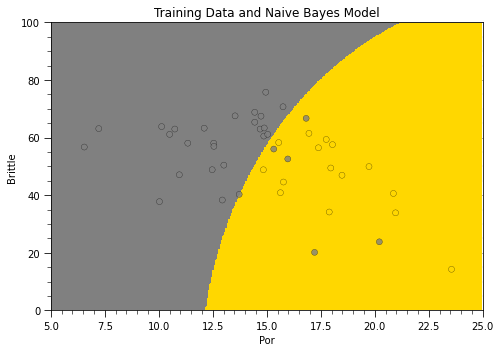

In [49]:
visualize_model(GaussianNB_fit,X_train[Xname[0]],Xmin[0],Xmax[0],X_train[Xname[1]],Xmin[1],Xmax[1],y_train[ycname],0.0,1.0,
                'Training Data and Naive Bayes Model',[0,1],['Low Production','High Production'],binary_cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

We could also visualize the posterior probabilities of low and high production.

* here's the posterior probability of low and high production over the predictor feature space

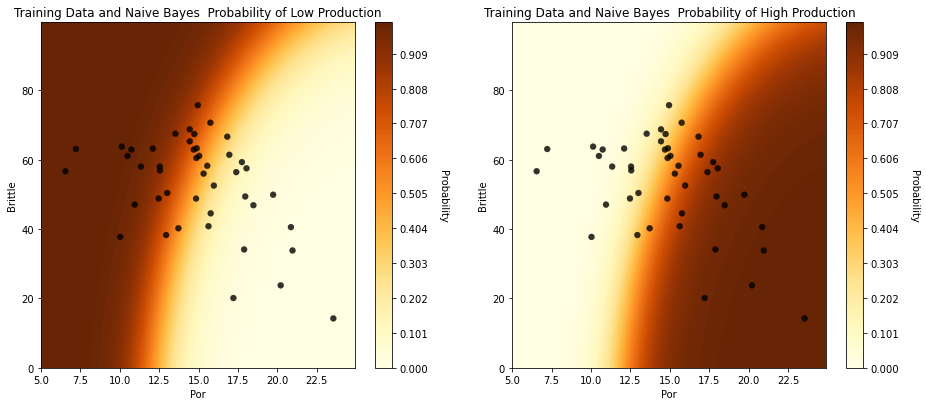

In [50]:
visualize_model_prob(GaussianNB_fit,X_train[Xname[0]],Xmin[0],Xmax[0],X_train[Xname[1]],Xmin[1],Xmax[1],y_train[yname],
                     'Training Data and Naive Bayes ')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

We have a reasonable model to predict well production from porosity and brittleness for an unconventional reservoir.

#### Comments

This was a basic treatment of naive Bayes classifier. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)